In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv("./data.txt", sep = "\t")

In [48]:
df.head()

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0


### **Isolate the features and labels**

In [49]:
X_train = df[["x1", "x2"]].values
y_train = df["label"].values

In [50]:
X_train.shape, y_train.shape

((20, 2), (20,))

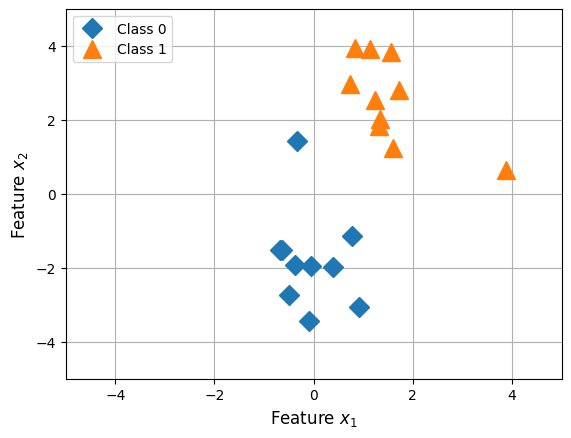

In [51]:
plt.plot(
  X_train[y_train == 0, 0],
  X_train[y_train == 0, 1],
  marker = "D",
  markersize = 10,
  linestyle = "",
  label = "Class 0"
)

plt.plot(
  X_train[y_train == 1, 0],
  X_train[y_train == 1, 1],
  marker = "^",
  markersize = 13,
  linestyle = "",
  label = "Class 1"
)

plt.legend(loc = 2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize = 12)
plt.ylabel("Feature $x_2$", fontsize = 12)

plt.grid()
plt.show()

### **Define a basic perceptron**

- A perceptron can be considered as very elementary classifier
- It essentially takes the weighted sum of inputs and bias
  - Passes it through a step function to output either $1$ or $0$
$$
z = b + \textbf{x}\textbf{w} \\[10pt]
prediction = \begin{cases} 1, \ z \geq 0.0 \\ 0, \ z \lt 0.0 \end{cases}
$$

In [52]:
class Perceptron:
  def __init__(self, num_features):
    self.num_features = num_features
    self.weights = [0.0 for _ in range(num_features)]
    self.bias = 0.0

  def forward(self, x):
    z = self.bias

    for i, _ in enumerate(self.weights):
      z += x[i] * self.weights[i]
    
    prediction = 1 if z > 0.0 else 0
    return prediction

  def update(self, x, y):
    pred = self.forward(x)
    error = y - pred

    self.bias += error
    for i, _ in enumerate(self.weights):
      self.weights[i] += error * x[i]
    
    return error

In [53]:
ppn = Perceptron(num_features = 2)

x = [1.1, 2.1]
ppn.update(x, y = 1)

1

In [54]:
ppn.weights, ppn.bias

([1.1, 2.1], 1.0)

In [55]:
def train(model, x, y, epochs = 10):
  for epoch in range(epochs):
    error_count = 0

    for x_, y_ in zip(x, y):
      error = model.update(x_, y_)
      error_count += abs(error)
    
    print(f"Epoch: {epoch + 1}, errors: {error_count}")

In [56]:
ppn = Perceptron(num_features = 2)
train(ppn, X_train, y_train, epochs = 5)

Epoch: 1, errors: 1
Epoch: 2, errors: 3
Epoch: 3, errors: 1
Epoch: 4, errors: 0
Epoch: 5, errors: 0
